In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.DataFrame({'height':[160,170,np.nan,180,175,np.nan,165,172,168]})

# Data Cleansing

## Handling Missing Data

In [ ]:
import numpy as np
import pandas as pd

# Creating a sample data
data = {'Score': [25, np.nan, 30, np.nan, 29, 27, 32, 31]}
df = pd.DataFrame(data)

# Mean Imputation
df['Score_Mean'] = df['Score'].fillna(df['Score'].mean())

# Median Imputation
df['Score_Median'] = df['Score'].fillna(df['Score'].median())

# Mode Imputation
df['Score_Mode'] = df['Score'].fillna(df['Score'].mode()[0])

print(df)

   Score  Score_Mean  Score_Median  Score_Mode
0   25.0        25.0          25.0        25.0
1    NaN        29.0          29.5        25.0
2   30.0        30.0          30.0        30.0
3    NaN        29.0          29.5        25.0
4   29.0        29.0          29.0        29.0
5   27.0        27.0          27.0        27.0
6   32.0        32.0          32.0        32.0
7   31.0        31.0          31.0        31.0


## Handling Outliers

In [ ]:
np.random.seed(42)

In [ ]:
data = pd.DataFrame({
    'Feature_A':np.random.normal(loc=50,scale=10,size=100),
    'Feature_B' : np.random.normal(loc=100,scale=20,size=100),
})

In [ ]:
data.iloc[5,0]=500
data.iloc[20,1]=200
data.iloc[35,1]=250

In [ ]:
def handle_outliers_iqr(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)

    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [ ]:
filtered_data = handle_outliers_iqr(data)

In [ ]:
filtered_data

,Feature_A,Feature_B
0,54.967142,71.692585
1,48.617357,91.587094
2,56.476885,93.145710
3,65.230299,83.954455
4,47.658466,96.774286
...,...,...
95,35.364851,107.706348
96,52.961203,82.322851
97,52.610553,103.074502
98,50.051135,101.164174


# Dimensionality Reduction

## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(data)
    return pd.DataFrame(data=principalComponents, columns=[f'PC{i+1}' for i in range(n_components)])

In [ ]:
np.random.seed(42)
n_samples = 1000
n_features = 50
X_heigh_dim = np.random.rand(n_samples,n_features)

In [ ]:
xpca = apply_pca(X_heigh_dim,2)

In [ ]:
xpca

,PC1,PC2
0,-0.718066,0.107136
1,0.539385,0.447425
2,0.193334,-0.649343
3,-0.507132,0.425796
4,-0.629888,-0.096967
...,...,...
995,0.347006,0.235755
996,-0.349924,0.626155
997,0.393834,-0.021486
998,-0.114517,0.378558


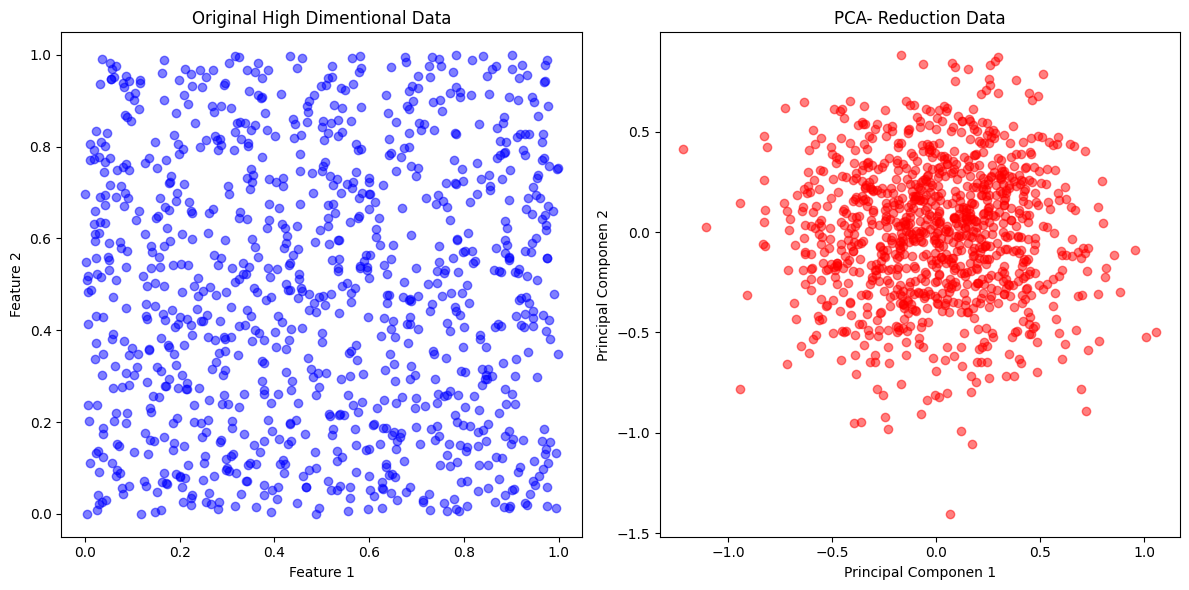

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].scatter(X_heigh_dim[:,0],X_heigh_dim[:,1],c='blue',alpha=0.5)
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].set_title('Original High Dimentional Data')
axs[1].scatter(xpca['PC1'],xpca['PC2'],c='red',alpha=0.5)
axs[1].set_xlabel('Principal Componen 1')
axs[1].set_ylabel('Principal Componen 2')
axs[1].set_title('PCA- Reduction Data')
plt.tight_layout()
plt.show()

# Feature Enginering

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
data = pd.DataFrame({
    'Feature_A':[10,20,30,40,50],
    'Feature_B':[100,200,300,400,500],
    'Feature_C':[2,4,6,8,10]
})
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(data)

In [ ]:
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(data)

In [ ]:
print('original data :')
X.head()

original data :


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('\Standarized Data : ')
pd.DataFrame(X_standardized,columns=data.columns).head()

\Standarized Data : 


,Feature_A,Feature_B,Feature_C
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


In [ ]:
print('\n Normalized data:')
pd.DataFrame(X_normalized,columns=data.columns).head()


 Normalized data:


,Feature_A,Feature_B,Feature_C
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


## Label Encoding

Label Encoding converts categorical labels into integer values. Label encoding is typically used for both nominal and ordinal data, but it is more commonly used for nominal data where no inherent order is present.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# sample data
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

In [ ]:
le = LabelEncoder()
df['color_encoded'] = le.fit_transform(df['Color'])
df.head()

,Color,color_encoded
0,Red,2
1,Blue,0
2,Green,1
3,Blue,0
4,Red,2


## One-Hot Encoding

One-Hot Encoding creates binary columns for each category. Use this method when the categorical feature is nominal (i.e., categories do not have a meaningful order) and the number of categories is small.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(df[['Color']])

df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Color']))

df_encoded

,Color_Blue,Color_Green,Color_Red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


## Ordinal Encoding
Ordinal Encoding assigns ordinal numbers to each category based on the order. Use this method when the categorical feature has a meaningful order (ordinal data) and the number of categories is small.

In [ ]:
data = {'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']}
df = pd.DataFrame(data)

# define the order of the categories
size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}

# ordinal Encoding
df['Size_encoded'] = df['Size'].map(size_mapping)

print(df)

     Size  Size_encoded
0   Small             1
1  Medium             2
2   Large             3
3  Medium             2
4   Small             1


# Sampling Data

## Random Sampling
Randomly selects data points from the dataset.

In [ ]:
# Example DataFrame
data = pd.DataFrame({'ID': range(1, 101), 'Value': range(101, 201)})

# Random Sampling (10% of the data)
random_sample = data.sample(frac=0.1, random_state=42)  # Set random_state for reproducibility
print(random_sample)

    ID  Value
83  84    184
53  54    154
70  71    171
45  46    146
44  45    145
39  40    140
22  23    123
80  81    181
10  11    111
0    1    101


## Stratified Sampling
Ensures the proportion of categories (strata) in the sample matches that in the population

In [ ]:
from sklearn.model_selection import train_test_split

# Example DataFrame with a categorical column
data = pd.DataFrame({'ID': range(1, 101),
                     'Category': ['A', 'B'] * 50})

# Stratified Sampling (20% of data)
train, stratified_sample = train_test_split(data,
                                            test_size=0.2,
                                            stratify=data['Category'],
                                            random_state=42)
print(stratified_sample)


    ID Category
15  16        B
55  56        B
27  28        B
3    4        B
14  15        A
28  29        A
40  41        A
51  52        B
36  37        A
44  45        A
84  85        A
17  18        B
98  99        A
76  77        A
20  21        A
87  88        B
39  40        B
56  57        A
13  14        B
69  70        B


## Cluster Sampling
Divide the population into clusters and randomly select entire clusters.

In [ ]:
import numpy as np

# Example DataFrame with clusters
data = pd.DataFrame({'ID': range(1, 101),
                     'Cluster': np.random.choice(['Cluster1', 'Cluster2', 'Cluster3'], size=100)})

# Select one random cluster
selected_cluster = data[data['Cluster'] == 'Cluster1']
print(selected_cluster)

     ID   Cluster
4     5  Cluster1
6     7  Cluster1
11   12  Cluster1
14   15  Cluster1
15   16  Cluster1
18   19  Cluster1
19   20  Cluster1
24   25  Cluster1
28   29  Cluster1
29   30  Cluster1
31   32  Cluster1
33   34  Cluster1
35   36  Cluster1
39   40  Cluster1
40   41  Cluster1
43   44  Cluster1
48   49  Cluster1
50   51  Cluster1
52   53  Cluster1
54   55  Cluster1
62   63  Cluster1
64   65  Cluster1
68   69  Cluster1
71   72  Cluster1
72   73  Cluster1
76   77  Cluster1
77   78  Cluster1
80   81  Cluster1
82   83  Cluster1
86   87  Cluster1
91   92  Cluster1
94   95  Cluster1
95   96  Cluster1
96   97  Cluster1
97   98  Cluster1
99  100  Cluster1


## Convenience Sampling
Selects a sample based on ease of access (e.g., first N rows).

In [ ]:
# Select the first 10 rows
convenience_sample = data.head(10)
print(convenience_sample)

   ID   Cluster
0   1  Cluster2
1   2  Cluster3
2   3  Cluster3
3   4  Cluster3
4   5  Cluster1
5   6  Cluster3
6   7  Cluster1
7   8  Cluster2
8   9  Cluster2
9  10  Cluster3


# Data Transformation

Data transformation in Python involves modifying or converting data into a suitable format for analysis

## Binning
Groups continuous data into bins.

In [ ]:
data = pd.DataFrame({'Age': [15, 25, 35, 45, 55]})
bins = [0, 20, 40, 60]
labels = ['Youth', 'Adult', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)
print(data)

   Age Age_Group
0   15     Youth
1   25     Adult
2   35     Adult
3   45    Senior
4   55    Senior


## Normalization
Scales data to have unit norm (useful for machine learning models).

In [ ]:
from sklearn.preprocessing import Normalizer

data = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
normalizer = Normalizer()
normalized_data = normalizer.fit_transform(data)
normalized_df = pd.DataFrame(normalized_data, columns=data.columns)
print(normalized_df)

          A         B
0  0.242536  0.970143
1  0.371391  0.928477
2  0.447214  0.894427


# Data Inbalancing

## Undersampling
Reduces the size of the majority class to match the minority class.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Example DataFrame
data = pd.DataFrame({'Feature': [1, 2, 3, 4, 5, 6],
                     'Target': [0, 0, 0, 1, 1, 1]})

X = data[['Feature']]  # Features
y = data['Target']     # Target

# Apply random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

# Combine the resampled features and target into a DataFrame
result = pd.concat([pd.DataFrame(X_under, columns=['Feature']), pd.Series(y_under, name='Target')], axis=1)

print(result)


   Feature  Target
0        1       0
1        2       0
2        3       0
3        4       1
4        5       1
5        6       1


## Oversampling
Duplicates or generates synthetic samples of the minority class.

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assume X and y are defined
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)

# Combine X_over and y_over into a DataFrame
over_df = pd.concat([pd.DataFrame(X_over, columns=X.columns), pd.Series(y_over, name='Target')], axis=1)

print(over_df)

   Feature  Target
0        1       0
1        2       0
2        3       0
3        4       1
4        5       1
5        6       1


## Resampling
is a broader term encompassing methods like upsampling and downsampling, which are used to handle imbalanced datasets

### Upsampling
Increase the number of minority class examples by duplicating or generating synthetic data.

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Example dataset
data = pd.DataFrame({
    'Feature': [1, 2, 3, 4, 5, 6],
    'Target': [0, 0, 0, 1, 1, 1]
})

# Separate majority and minority classes
majority = data[data['Target'] == 0]
minority = data[data['Target'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority,
                              replace=True,   # Allow replacement
                              n_samples=len(majority),  # Match majority size
                              random_state=42)  # For reproducibility

# Combine majority and upsampled minority
upsampled_data = pd.concat([majority, minority_upsampled])

print(upsampled_data)

   Feature  Target
0        1       0
1        2       0
2        3       0
5        6       1
3        4       1
5        6       1


### Downsampling
Reduce the number of majority class examples to match the minority class size

In [ ]:
# Downsample the majority class
majority_downsampled = resample(majority,
                                replace=False,  # No replacement
                                n_samples=len(minority),  # Match minority size
                                random_state=42)  # For reproducibility

# Combine downsampled majority and minority
downsampled_data = pd.concat([majority_downsampled, minority])

print(downsampled_data)

   Feature  Target
0        1       0
1        2       0
2        3       0
3        4       1
4        5       1
5        6       1


## SMOTE (Synthetic Minority Oversampling Technique)
Generates synthetic samples for the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
np.random.seed(42)

In [ ]:
X = np.random.rand(100,2)
y = np.array([0]*90+[1]*10)

In [ ]:
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)

In [ ]:
print('class distribution afther SMOTE.')
print(pd.Series(y_resampled).value_counts())

class distribution afther SMOTE.
0    90
1    90
Name: count, dtype: int64


## Upsampling vs Downsampling vs Oversampling vs Undersampling

| **Aspect**              | **Upsampling**                                | **Downsampling**                              | **Oversampling**                           | **Undersampling**                           |
|--------------------------|-----------------------------------------------|-----------------------------------------------|--------------------------------------------|---------------------------------------------|
| **Definition**           | Increasing the total size of a dataset by duplicating or generating new samples. | Reducing the total size of a dataset by removing samples. | Increasing the size of the minority class.  | Reducing the size of the majority class.    |
| **Objective**            | Create balance by adding samples.            | Create balance by removing samples.           | Focus on minority class data.              | Focus on majority class data.               |
| **Target**               | Applied to the whole dataset (majority and minority classes). | Applied to the whole dataset (majority and minority classes). | Only the minority class is affected.       | Only the majority class is affected.        |
| **Approach**             | Adds duplicate or synthetic samples to either class. | Removes samples from either class to adjust balance. | Adds duplicate or synthetic samples to the minority class. | Removes samples from the majority class.    |
| **Impact on Dataset Size** | Increases overall size of the dataset.       | Decreases overall size of the dataset.        | Increases dataset size by adding minority samples. | Reduces dataset size by removing majority samples. |
| **Risk of Overfitting**  | Yes, if duplicating samples without adding variety. | No risk of overfitting, but risk of underfitting due to loss of data. | Yes, if duplicating minority samples without synthetic techniques. | No risk of overfitting, but risk of underfitting if critical data is removed. |
| **Best Use Case**        | Small datasets needing more data for robust learning. | Large datasets with redundant or irrelevant data. | Imbalanced datasets where the minority class needs emphasis. | Imbalanced datasets where majority class dominates excessively. |
| **Techniques Involved**  | Duplication, interpolation, or external data generation. | Random or informed sampling methods.         | Random oversampling, SMOTE, ADASYN.        | Random undersampling, Tomek Links, ENN.     |
| **Advantages**           | - Helps balance class distribution.<br>- Increases training data for minority class. | - Reduces training complexity.<br>- Prevents models from focusing on the majority class. | - Provides the model more examples to learn minority patterns.<br>- Reduces class imbalance. | - Makes the dataset smaller and faster to process.<br>- Can improve model efficiency. |
| **Disadvantages**        | - Can lead to larger datasets and increased computational costs.<br>- Risk of introducing noise with synthetic data. | - Loss of potentially important data.<br>- May hurt the model's ability to generalize. | - May cause overfitting if duplicate data is added.<br>- Increased computational load. | - Risk of losing key patterns in majority data.<br>- Can cause underfitting if too much data is removed. |
